[0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0, 1.05, 1.1, 1.1500000000000001, 1.2000000000000002, 1.25, 1.3, 1.35, 1.4000000000000001, 1.4500000000000002, 1.5, 1.55, 1.6, 1.6500000000000001, 1.7000000000000002, 1.75, 1.8, 1.85, 1.9000000000000001, 1.9500000000000002, 2.0, 2.0500000000000003, 2.1, 2.15, 2.2, 2.25, 2.3000000000000003, 2.35, 2.4000000000000004, 2.45, 2.5, 2.5500000000000003, 2.6, 2.6500000000000004, 2.7, 2.75, 2.8000000000000003, 2.85, 2.9000000000000004, 2.95, 3.0, 3.0500000000000003, 3.1, 3.1500000000000004, 3.2, 3.25, 3.3000000000000003, 3.35, 3.4000000000000004, 3.45, 3.5, 3.5500000000000003, 3.6, 3.6500000000000004, 3.7, 3.75, 3.8000000000000003, 3.85, 3.9000000000000004, 3.95]
./configs/harmonic_driven.json
5.0
125.66370614359172
./configs/harmonic_driven.json
5.0
62.83185307179586
./configs/harmonic_

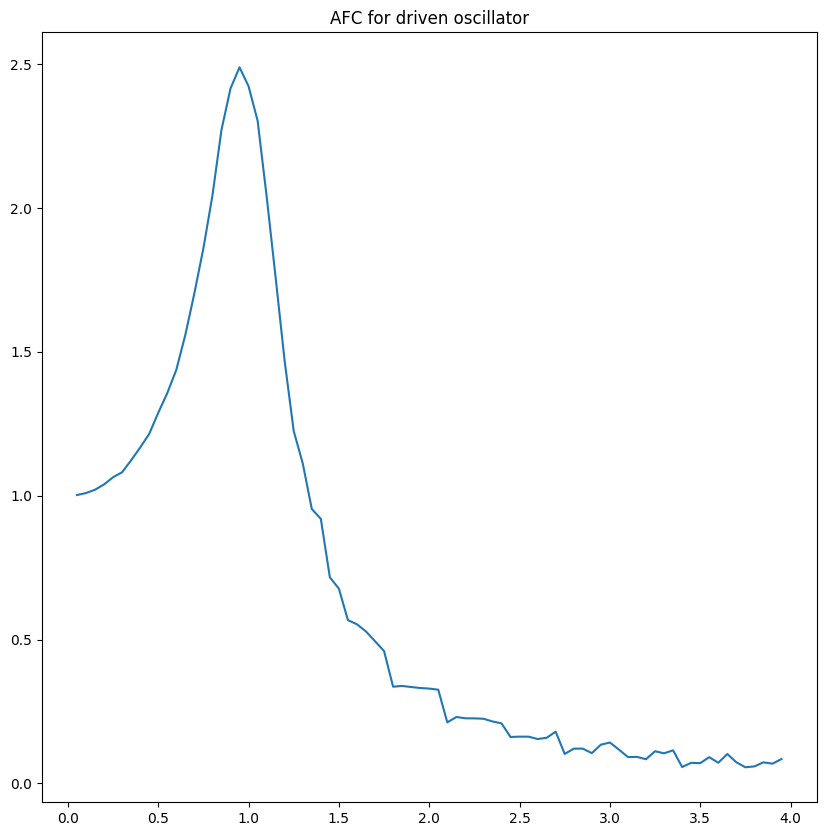

In [1]:
from src.plot_context import *
from src.config_helper import *
from src.plotter import *
from src.AFC import *

import matplotlib.pyplot as plt

# sympy
# plot only range
# virutal inheritance (both damped and driven and physic)
# make damped, driven only function that init DiffEq
# make GUI
# make visualization
# find amplitude of dataset
# Make report
# add delta t to bin data

def prepare_harmonic_and_physic():

    fig, ax = plt.subplots(1)
    ax.set_title('AFC for driven oscillator')
    fig.set_size_inches(10, 10)
    # axs.set_xlabel('Time sample')
    # axs.set_ylabel('X coordiante')
    
    return fig, ax

damped_config = Config('harmonic_driven',{
                                        	"model" : "HarmonicDriven",
                                        	"solver" : "rk4",
                                        	"output" : "harmonic_driven.bin",
                                        
                                        	"m" : 1,
                                        	"w" : 1,
                                        	"damp_ratio" : 0.2,
                                        	"A" : 1,
                                        	"Omega" : 2,
                                        
                                        	"x0" : 2, 
                                        	"v0" : 0,
                                        
                                        	"t1" : 0,
                                        	"t2" : 400,
                                        	"sampleNum" : 800
                                            })

with PlotContextManager(prepare_harmonic_and_physic, "driven_AFC") as ax:

        divider = 20
        omegas = [damped_config['w'] / divider * i for i in range (1, divider * 4)]
        print(omegas)

        amplitudes = []
    
        for omega in omegas:

            damped_config['Omega'] = omega
            damped_config.write()
            
            solver_program_path = './solver.exe'
            run_config(solver_program_path, damped_config.name)
            
            solver_name = damped_config['solver']
            damp_ratio = damped_config['damp_ratio']
        
            ses_name = f'harmonic driven {solver_name}, Omega = {omega}'
            ses_info = SesInfo(ses_name, damped_config, Style('.'))
            
            amplitude = find_steady_state_amplitude(damped_config['w'],
                                                    damped_config['damp_ratio'],
                                                    damped_config['Omega'],
                                                    damped_config['t2'] / damped_config['sampleNum'],
                                                    ses_info.data)
            
            amplitudes.append(amplitude)
        
        ax.plot(omegas, amplitudes)
    
        # plt.savefig('damped_driven_different_omegas.svg')
     

steady time: 5.0
force period time: 1.5707963267948966
dt: 0.0625
0.06172905


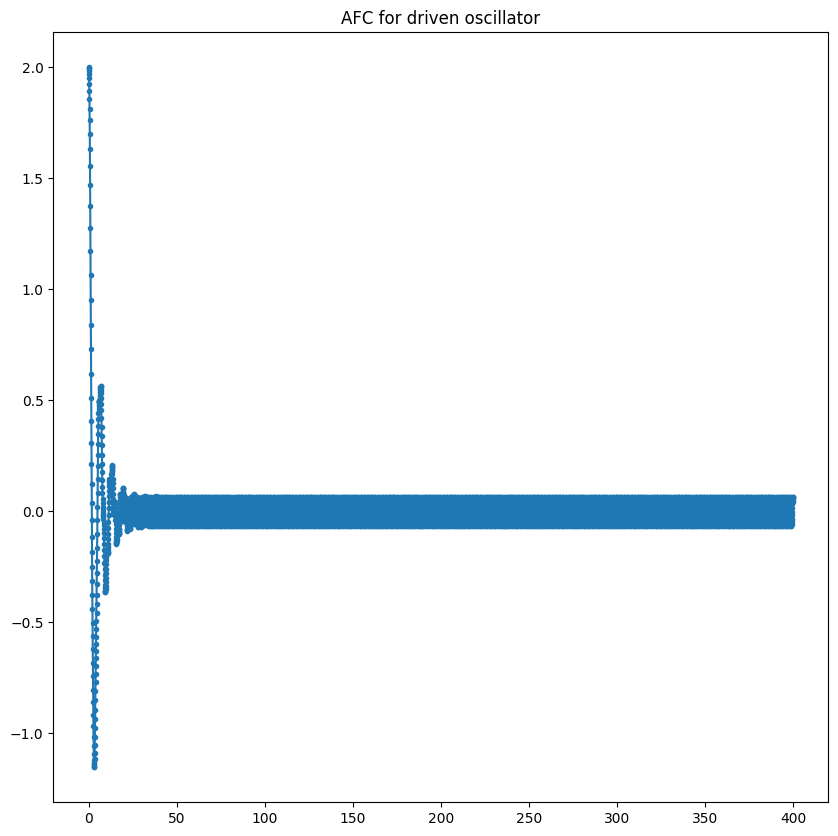

In [5]:
from src.plot_context import *
from src.config_helper import *
from src.plotter import *
from src.AFC import *

import matplotlib.pyplot as plt

# sympy
# plot only range
# virutal inheritance (both damped and driven and physic)
# make damped, driven only function that init DiffEq
# make GUI
# make visualization
# find amplitude of dataset
# Make report
# add delta t to bin data

def prepare_harmonic_and_physic():

    fig, ax = plt.subplots(1)
    ax.set_title('AFC for driven oscillator')
    fig.set_size_inches(10, 10)
    # axs.set_xlabel('Time sample')
    # axs.set_ylabel('X coordiante')
    
    return fig, ax

damped_config = Config('harmonic_driven',{
                                        	"model" : "HarmonicDriven",
                                        	"solver" : "rk4",
                                        	"output" : "harmonic_driven.bin",
                                        
                                        	"m" : 1,
                                        	"w" : 1,
                                        	"damp_ratio" : 0.2,
                                        	"A" : 1,
                                        	"Omega" : 0.05,
                                        
                                        	"x0" : 2, 
                                        	"v0" : 0,
                                        
                                        	"t1" : 0,
                                        	"t2" : 400,
                                        	"sampleNum" : 6400
                                            })

with PlotContextManager(prepare_harmonic_and_physic, "driven_AFC") as ax:

        omega = damped_config['Omega'] = 4
        damped_config.write()
    
        solver_program_path = './solver.exe'
        run_config(solver_program_path, damped_config.name)
        
        solver_name = damped_config['solver']
        damp_ratio = damped_config['damp_ratio']
    
        ses_name = f'harmonic driven {solver_name}, Omega = {omega}'
        ses_info = SesInfo(ses_name, damped_config, Style('.'))
        
        amplitude = find_steady_state_amplitude(damped_config['w'],
                                                damped_config['damp_ratio'],
                                                damped_config['Omega'],
                                                damped_config['t2'] / damped_config['sampleNum'],
                                                ses_info.data)
        print(amplitude)
        SesPlotter.plot_x(ses_info, ax)
    # plt.savefig('damped_driven_different_omegas.svg')
 

[0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0, 1.05, 1.1, 1.1500000000000001, 1.2000000000000002, 1.25, 1.3, 1.35, 1.4000000000000001, 1.4500000000000002, 1.5, 1.55, 1.6, 1.6500000000000001, 1.7000000000000002, 1.75, 1.8, 1.85, 1.9000000000000001, 1.9500000000000002, 2.0, 2.0500000000000003, 2.1, 2.15, 2.2, 2.25, 2.3000000000000003, 2.35, 2.4000000000000004, 2.45, 2.5, 2.5500000000000003, 2.6, 2.6500000000000004, 2.7, 2.75, 2.8000000000000003, 2.85, 2.9000000000000004, 2.95, 3.0, 3.0500000000000003, 3.1, 3.1500000000000004, 3.2, 3.25, 3.3000000000000003, 3.35, 3.4000000000000004, 3.45, 3.5, 3.5500000000000003, 3.6, 3.6500000000000004, 3.7, 3.75, 3.8000000000000003, 3.85, 3.9000000000000004, 3.95]


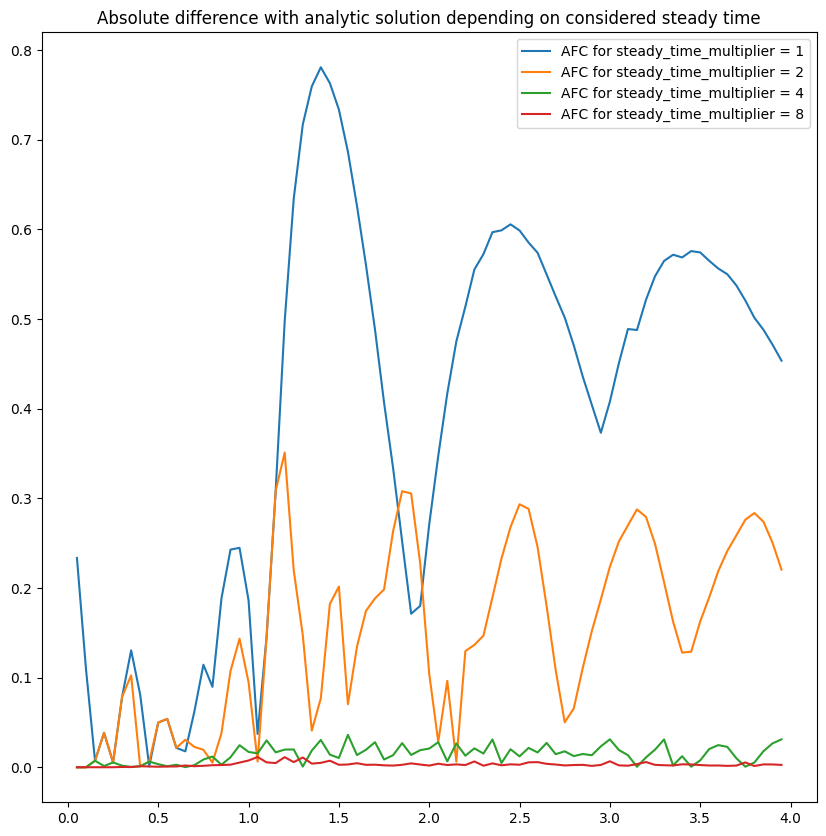

In [24]:
from src.plot_context import *
from src.config_helper import *
from src.plotter import *
from src.AFC import *

import matplotlib.pyplot as plt

# sympy
# plot only range
# virutal inheritance (both damped and driven and physic)
# make damped, driven only function that init DiffEq
# make GUI
# make visualization
# find amplitude of dataset
# Make report
# add delta t to bin data

def prepare_harmonic_and_physic():

    fig, ax = plt.subplots(1)
    ax.set_title('Absolute difference with analytic solution depending on considered steady time')
    fig.set_size_inches(10, 10)
    # axs.set_xlabel('Time sample')
    # axs.set_ylabel('X coordiante')
    
    return fig, ax

damped_config = Config('harmonic_driven',{
                                        	"model" : "HarmonicDriven",
                                        	"solver" : "rk4",
                                        	"output" : "harmonic_driven.bin",
                                        
                                        	"m" : 1,
                                        	"w" : 1,
                                        	"damp_ratio" : 0.2,
                                        	"A" : 1,
                                        	"Omega" : 2,
                                        
                                        	"x0" : 2, 
                                        	"v0" : 0,
                                        
                                        	"t1" : 0,
                                        	"t2" : 400,
                                        	"sampleNum" : 2000
                                            })

def get_analytic_amplitude(w0, damp_ratio, m, A, omega):

    Z = ((2 * w0 * damp_ratio) ** 2 + omega ** (-2) * (w0**2 - omega**2) ** 2) ** 0.5
    
    return A / (m * omega * Z)

with PlotContextManager(prepare_harmonic_and_physic, "driven_AFC") as ax:

        divider = 20
        omegas = [damped_config['w'] / divider * i for i in range (1, divider * 4)]
        print(omegas)

        steady_multipliers = [1, 2, 4, 8]
    
        for steady_time_multiplier in steady_multipliers:

            amplitudes = []
            analytical_amplitudes = []
            
            for omega in omegas:
    
                damped_config['Omega'] = omega
                damped_config.write()
                
                solver_program_path = './solver.exe'
                run_config(solver_program_path, damped_config.name)
                
                solver_name = damped_config['solver']
                damp_ratio = damped_config['damp_ratio']
            
                ses_name = f'harmonic driven {solver_name}, Omega = {omega}'
                ses_info = SesInfo(ses_name, damped_config, Style('.'))
    
                amplitude = find_steady_state_amplitude(damped_config['w'],
                                                        damped_config['damp_ratio'],
                                                        damped_config['Omega'],
                                                        damped_config['t2'] / damped_config['sampleNum'],
                                                        ses_info.data,
                                                        steady_time_multiplier)
                
                amplitudes.append(amplitude)
                
                analytical_amplitudes.append(get_analytic_amplitude(damped_config['w'],
                                                                      damped_config['damp_ratio'],
                                                                      damped_config['m'],
                                                                      damped_config['A'],
                                                                      omega))
            
            ax.plot(omegas, np.abs(np.array(amplitudes) - np.array(analytical_amplitudes)), label = f'AFC for steady_time_multiplier = {steady_time_multiplier}')

        ax.legend()
        plt.savefig('AFC_differ_steady_time.svg')
     

[0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0, 1.05, 1.1, 1.1500000000000001, 1.2000000000000002, 1.25, 1.3, 1.35, 1.4000000000000001, 1.4500000000000002, 1.5, 1.55, 1.6, 1.6500000000000001, 1.7000000000000002, 1.75, 1.8, 1.85, 1.9000000000000001, 1.9500000000000002, 2.0, 2.0500000000000003, 2.1, 2.15, 2.2, 2.25, 2.3000000000000003, 2.35, 2.4000000000000004, 2.45, 2.5, 2.5500000000000003, 2.6, 2.6500000000000004, 2.7, 2.75, 2.8000000000000003, 2.85, 2.9000000000000004, 2.95, 3.0, 3.0500000000000003, 3.1, 3.1500000000000004, 3.2, 3.25, 3.3000000000000003, 3.35, 3.4000000000000004, 3.45, 3.5, 3.5500000000000003, 3.6, 3.6500000000000004, 3.7, 3.75, 3.8000000000000003, 3.85, 3.9000000000000004, 3.95]


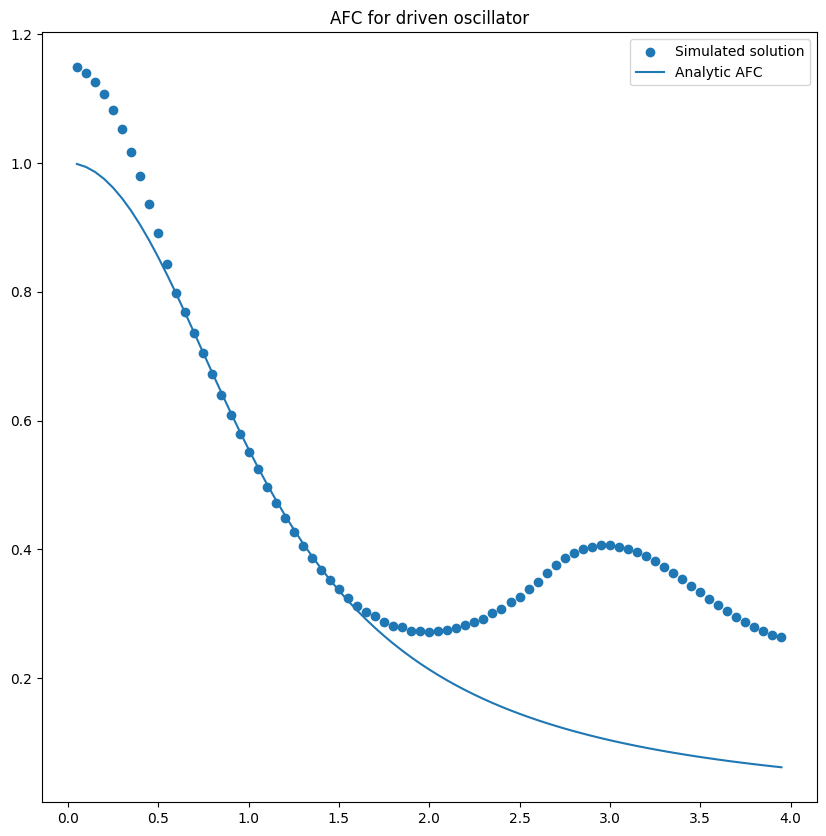

In [22]:
from src.plot_context import *
from src.config_helper import *
from src.plotter import *
from src.AFC import *

import matplotlib.pyplot as plt

# sympy
# plot only range
# virutal inheritance (both damped and driven and physic)
# make damped, driven only function that init DiffEq
# make GUI
# make visualization
# find amplitude of dataset
# Make report
# add delta t to bin data

def prepare_harmonic_and_physic():

    fig, ax = plt.subplots(1)
    ax.set_title('AFC for driven oscillator')
    fig.set_size_inches(10, 10)
    # axs.set_xlabel('Time sample')
    # axs.set_ylabel('X coordiante')
    
    return fig, ax

damped_config = Config('harmonic_driven',{
                                        	"model" : "HarmonicDriven",
                                        	"solver" : "rk4",
                                        	"output" : "harmonic_driven.bin",
                                        
                                        	"m" : 1,
                                        	"w" : 1,
                                        	"damp_ratio" : 0.9,
                                        	"A" : 1,
                                        	"Omega" : 2,
                                        
                                        	"x0" : 2, 
                                        	"v0" : 0,
                                        
                                        	"t1" : 0,
                                        	"t2" : 400,
                                        	"sampleNum" : 2000
                                            })

def get_analytic_amplitude(w0, damp_ratio, m, A, omega):

    Z = ((2 * w0 * damp_ratio) ** 2 + omega ** (-2) * (w0**2 - omega**2) ** 2) ** 0.5
    
    return A / (m * omega * Z)

with PlotContextManager(prepare_harmonic_and_physic, "driven_AFC") as ax:

        divider = 20
        omegas = [damped_config['w'] / divider * i for i in range (1, divider * 4)]
        print(omegas)

        amplitudes = []
        analytical_amplitudes = []
        
        for omega in omegas:

            damped_config['Omega'] = omega
            damped_config.write()
            
            solver_program_path = './solver.exe'
            run_config(solver_program_path, damped_config.name)
            
            solver_name = damped_config['solver']
            damp_ratio = damped_config['damp_ratio']
        
            ses_name = f'harmonic driven {solver_name}, Omega = {omega}'
            ses_info = SesInfo(ses_name, damped_config, Style('.'))

            amplitude = find_steady_state_amplitude(damped_config['w'],
                                                    damped_config['damp_ratio'],
                                                    damped_config['Omega'],
                                                    damped_config['t2'] / damped_config['sampleNum'],
                                                    ses_info.data,
                                                    3)
            
            amplitudes.append(amplitude)
            
            analytical_amplitudes.append(get_analytic_amplitude(damped_config['w'],
                                                                  damped_config['damp_ratio'],
                                                                  damped_config['m'],
                                                                  damped_config['A'],
                                                                  omega))
        
        ax.scatter(omegas, np.array(amplitudes), label = "Simulated solution")
        ax.plot(omegas, np.array(analytical_amplitudes), label = "Analytic AFC")
        ax.legend()
    
        plt.savefig('AFC.svg')
     